In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import ase
import matplotlib.pyplot as plt
from abtem.tilt import precession_tilts
from ase.io import read

import abtem

(examples:ped_quickstart)=
# PED quickstart

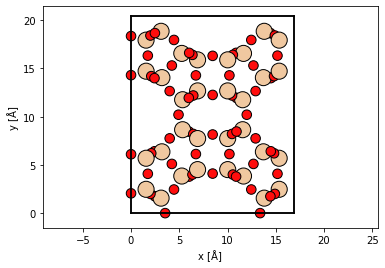

In [2]:
atoms = read("data/SiO2_zeolite.cif")

cell = atoms.cell.copy()

atoms *= (1, 1, 20)

abtem.show_atoms(atoms, plane="xy");

In [3]:
frozen_phonons = abtem.FrozenPhonons(atoms, 4, sigmas=0.078)

In [4]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=.5,
    projection="infinite",
    slice_thickness=1,
)

In [5]:
wave = abtem.PlaneWave(energy=100e3)
wave.grid.match(potential)

In [6]:
wave.tilt = precession_tilts(50, 5)

In [7]:
measurement = wave.multislice(potential).diffraction_patterns().mean(0).compute()

[########################################] | 100% Completed | 2.46 sms


In [8]:
spots = (
    measurement.crop(25)
    .block_direct()
    .index_diffraction_spots(cell=atoms, threshold=1e-5)
)

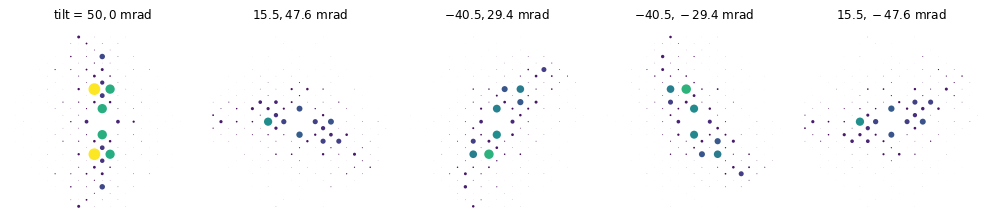

In [9]:
visualization = spots.show(explode=True, scale=0.8, figsize=(16, 5))
visualization.axis_off(spines=False)

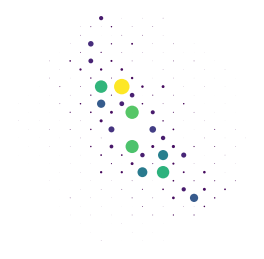

In [10]:
visualization = spots[-2].show(scale=0.8)
visualization.axis_off(spines=False)
visualization.fig.savefig(
    "../thumbnails/ped_quickstart.png", bbox_inches="tight", pad_inches=0
)